In [9]:
import pandas as pd
data1 = pd.read_csv("Bookings.csv")
data2 = pd.read_csv("Sessions.csv")
data1.head

<bound method NDFrame.head of       customer_id   booking_id   from_city from_country            to_city  \
0    customer_259   booking_82     Gurgaon        India          Ahmedabad   
1    customer_303  booking_156       Delhi        India           Brussels   
2    customer_203   booking_99  Devanhalli        India  Frankfurt am Main   
3    customer_211  booking_319     Gurgaon        India  Frankfurt am Main   
4    customer_287  booking_222     Gurgaon        India   Roissy-en-France   
..            ...          ...         ...          ...                ...   
334  customer_133  booking_238     Gurgaon        India         Rāja Sānsi   
335  customer_235   booking_37     Gurgaon        India        Bhubaneswar   
336   customer_62  booking_239     Gurgaon        India         Birmingham   
337    customer_5  booking_131      Mumbai        India             Kloten   
338  customer_241  booking_336     Gurgaon        India          Amsterdam   

         to_country          book

In [16]:
data2.head

<bound method NDFrame.head of        session_id    search_id               search_time  \
0     session_322   search_784  2020-01-21T21:35:38.910Z   
1     session_322   search_776  2020-01-21T21:37:37.697Z   
2     session_322   search_623  2020-01-21T21:36:11.392Z   
3     session_322   search_270  2020-01-21T21:16:07.685Z   
4     session_322   search_905  2020-01-21T21:34:55.673Z   
...           ...          ...                       ...   
1492  session_150   search_156  2018-12-18T22:59:43.764Z   
1493  session_120  search_1096      2021-12-23T17:29:37Z   
1494  session_120   search_962      2021-12-23T17:34:39Z   
1495  session_150  search_1306  2018-12-18T22:52:37.654Z   
1496  session_120  search_1180      2021-12-23T17:34:52Z   

         session_starting_time   booking_id  
0         2020-01-21T21:10:12Z          NaN  
1         2020-01-21T21:10:12Z          NaN  
2         2020-01-21T21:10:12Z          NaN  
3         2020-01-21T21:10:12Z          NaN  
4         2020-01-2

In [12]:
print(data1.info())
print("---------------------------------------------------------->")
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB
None
---------------------------------------------------------->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 en

In [18]:
distinct_booking = data1['booking_id'].nunique()
distinct_session = data2['session_id'].nunique()
distinct_searches = data2['search_id'].nunique()
print("The number of distinct booking is",distinct_booking)
print("The number of distinct session is",distinct_session)
print("The number of distinct searches is",distinct_searches)

The number of distinct booking is 339
The number of distinct session is 331
The number of distinct searches is 1360


In [21]:
# Group by session_id and count non-null booking_id values
bookings_per_session = data2.groupby('session_id')['booking_id'].count()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = bookings_per_session[bookings_per_session > 1]

# Count the number of sessions with more than one booking
count_of_sessions = sessions_with_multiple_bookings.count()
print(count_of_sessions)

35


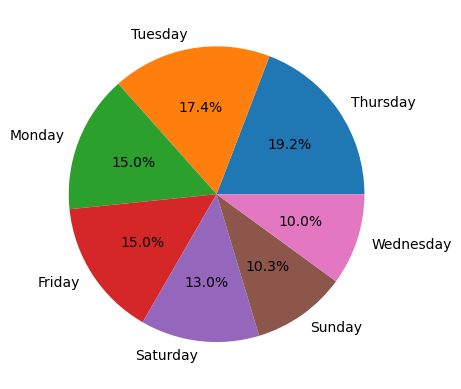

In [30]:
from matplotlib import pyplot as plt
# Assuming data1 is your DataFrame
datetime = pd.to_datetime(data1['booking_time'])
day = datetime.dt.day_name()
day_count = day.value_counts()
plt.pie(day_count, labels=day_count.index, autopct='%1.1f%%')

# show plot
plt.show()

In [11]:
group = data1.groupby('service_name').agg(
    count =('service_name','size'),
    Gross_Amt = ('INR_Amount', 'sum')
).reset_index()
print(group)

  service_name  count   Gross_Amt
0      GOIBIBO    186  5897637.97
1          MMT     48   665669.08
2        YATRA    105  3378702.13


In [36]:
# Group by customer_id and count non-null booking_id values
customers_per_booking = data1.groupby('customer_id')['booking_id'].count()

# Filter customers with more than one booking
customers_with_multiple_bookings = customers_per_booking[customers_per_booking > 1]

# Check if there are any customers with multiple bookings
if customers_with_multiple_bookings.empty:
    print("No customers with more than one booking.")
else:
    # Filter the original data to include only customers with more than one booking
    filtered_data = data1[data1['customer_id'].isin(customers_with_multiple_bookings.index)]
    
    # Create a new column for the route
    filtered_data['route'] = filtered_data['from_city'] + ' to ' + filtered_data['to_city']
    
    # Group by route and count the number of bookings
    route_counts = filtered_data.groupby('route')['booking_id'].count()
    
    # Check if there are any routes
    if route_counts.empty:
        print("No routes found for customers with multiple bookings.")
    else:
        # Find the most booked route
        most_booked_route = route_counts.idxmax()
        most_booked_count = route_counts.max()
        
        print(f"The most booked route is {most_booked_route} with {most_booked_count} bookings.")


The most booked route is Gurgaon to Roissy-en-France with 5 bookings.


C:\Users\Bukola Awotoye\AppData\Local\Temp\ipykernel_16644\3000906154.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['route'] = filtered_data['from_city'] + ' to ' + filtered_data['to_city']


In [42]:
# Filter rows where 'days_to_departure' is greater tha
days_in_advance = data1[data1['days_to_departure'] > 0]
# Count occurrences of cities in 'from_city'
departure_city = days_in_advance['from_city'].value_counts()
# Filter cities that appear at least 5 times
departure_city = departure_city[departure_city >= 5]

# Print the top 3 most frequent cities
print(departure_city.head(3))

from_city
Gurgaon    131
Mumbai      34
Delhi       29
Name: count, dtype: int64


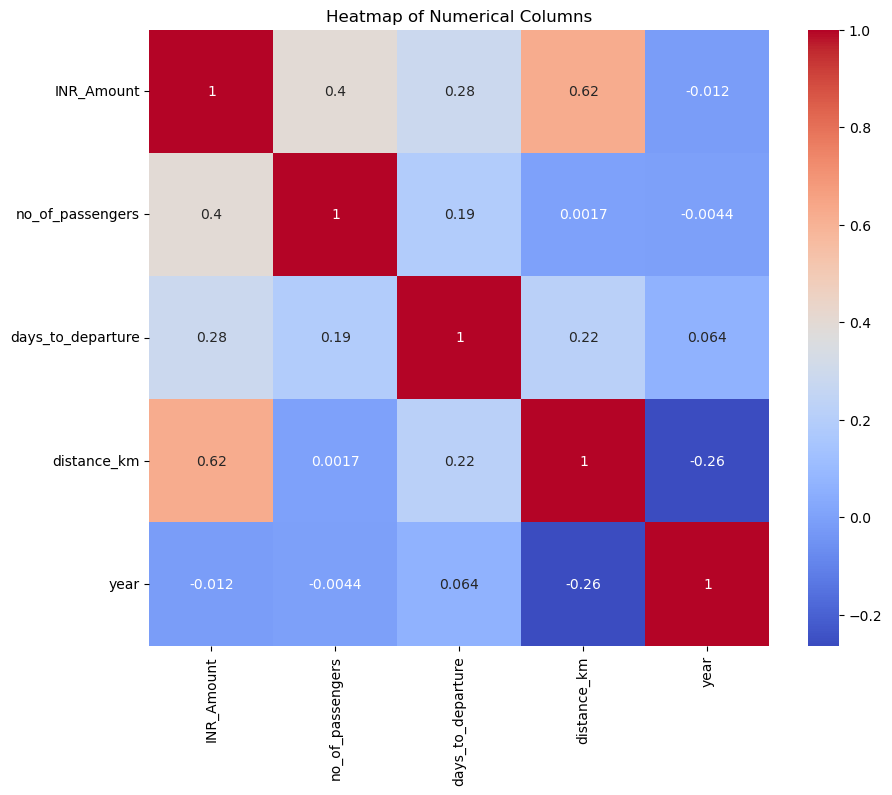

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select numerical columns
numerical_column = data1.select_dtypes(include=['int32','float64']).columns 
# Create a new DataFrame with only numerical columns
new_data = data1[numerical_column]
# Create a heatmap for the numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(new_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Columns')
plt.show()

# Summary of Heatmap Analysis
The heatmap analysis of the numerical columns in the dataset reveals several significant correlations:

1. INR_Amount and Distance (km): There is a strong positive correlation (0.62) between the amount in INR and the distance in kilometers. This indicates that as the travel distance increases, the corresponding amount in INR also tends to rise.
2. Year and Days to Departure: A moderate negative correlation (-0.26) is observed between the year and the days to departure. This suggests that in more recent years, the number of days to departure tends to decrease.
3. Number of Passengers and INR_Amount: There is a moderate positive correlation (0.4) between the number of passengers and the INR amount. This implies that an increase in the number of passengers is generally associated with a higher amount in INR.


These correlations provide valuable insights into the relationships between different variables in the dataset. Understanding these relationships can be instrumental for predictive modeling and identifying underlying patterns, thereby enhancing the overall analysis and decision-making process.

In [43]:
device_type = data1['device_type_used'].value_counts()
print(device_type.head(1))

device_type_used
Desktop    142
Name: count, dtype: int64


    year device_type_used  counts
0   2018          Android       6
1   2018          Desktop      28
2   2018              IOS       4
3   2018        MobileWeb       6
4   2018           Tablet       2
5   2019          Android      17
6   2019          Desktop      24
7   2019              IOS      18
8   2019           Tablet       1
9   2020          Android      30
10  2020          Desktop      41
11  2020              IOS      31
12  2020        MobileWeb      11
13  2021          Android      13
14  2021          Desktop      37
15  2021              IOS      27
16  2021        MobileWeb       7
17  2022          Android       4
18  2022          Desktop      12
19  2022              IOS      17
20  2022        MobileWeb       3


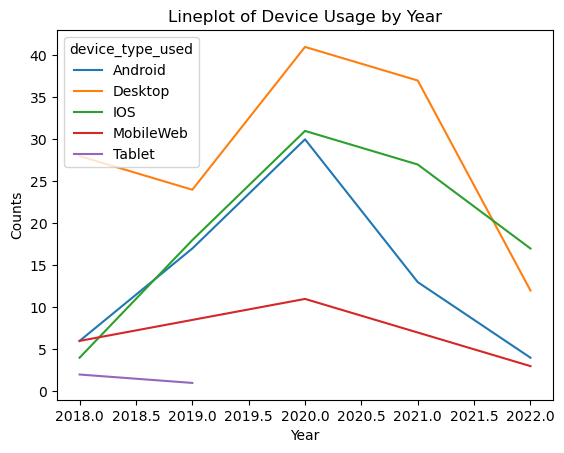

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert booking_time to datetime
data1['booking_time'] = pd.to_datetime(data1['booking_time'])

# Extract the year
data1['year'] = data1['booking_time'].dt.year

# Count occurrences of each device type per year
device_counts = data1.groupby(['year', 'device_type_used']).size().reset_index(name='counts')
print(device_counts)

# Plotting the line plot
sns.lineplot(data=device_counts, x='year', y='counts', hue='device_type_used')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Lineplot of Device Usage by Year')

# Display the plot
plt.show()

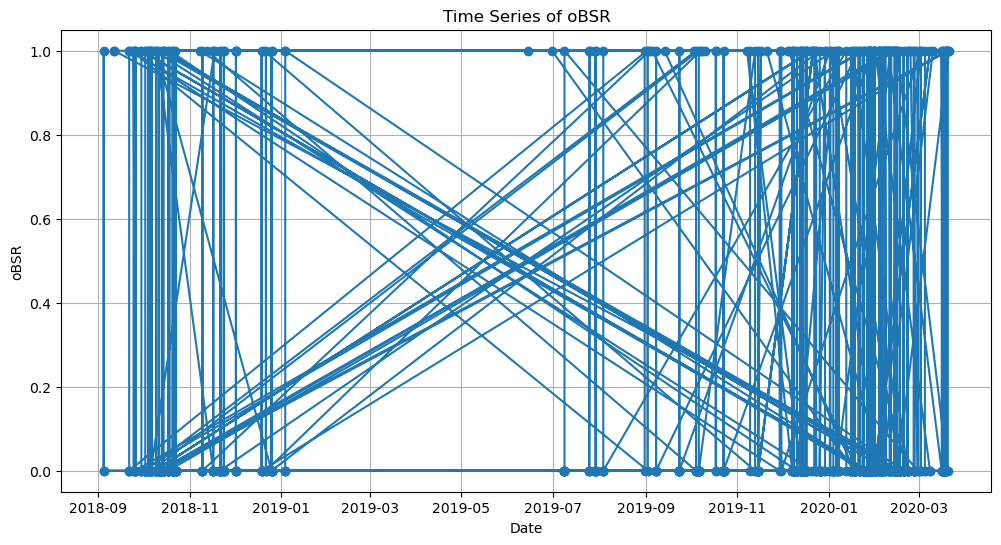

Average oBSR for each month:
month
1     0.205882
2     0.298507
3     0.319149
6     1.000000
7     0.208333
8     0.285714
9     0.327586
10    0.120968
11    0.233766
12    0.222930
Name: oBSR, dtype: float64

Average oBSR for each day of the week:
day_of_week
0    0.217105
1    0.239726
2    0.132075
3    0.180851
4    0.240876
5    0.240876
6    0.327586
Name: oBSR, dtype: float64


In [15]:
import matplotlib.pyplot as plt
# Convert booking_time and search_time to datetime
data1['booking_time'] = pd.to_datetime(data1['booking_time'], format='%Y-%m-%dT%H:%M:%S.%f%z', errors='coerce')
data2['search_time'] = pd.to_datetime(data2['search_time'], format='%Y-%m-%dT%H:%M:%S.%f%z', errors='coerce')

# Handle NaT values by dropping them
data2 = data2.dropna(subset=['search_time'])
# Merge bookings and searches on booking_id
merged_df = pd.merge(data2, data1, on='booking_id', how='left')

# Calculate oBSR
merged_df['oBSR'] = merged_df['booking_id'].notnull().astype(int)

# Calculate average oBSR for each month
merged_df['month'] = merged_df['search_time'].dt.month
monthly_avg_oBSR = merged_df.groupby('month')['oBSR'].mean()

# Calculate average oBSR for each day of the week
merged_df['day_of_week'] = merged_df['search_time'].dt.dayofweek
weekly_avg_oBSR = merged_df.groupby('day_of_week')['oBSR'].mean()

# Plot time series of oBSR
plt.figure(figsize=(12, 6))
plt.plot(merged_df['search_time'], merged_df['oBSR'], marker='o')
plt.title('Time Series of oBSR')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.grid(True)
plt.show()

# Print results
print("Average oBSR for each month:")
print(monthly_avg_oBSR)
print("\nAverage oBSR for each day of the week:")
print(weekly_avg_oBSR)

# Overall Booking to Search Ratio (oBSR)
Definition: The overall Booking to Search Ratio (oBSR) is a metric used to measure the efficiency and effectiveness of a booking system. It represents the ratio of the total number of bookings made to the total number of searches performed within a given period.

# Purpose:

1. Performance Indicator: oBSR serves as a key performance indicator (KPI) for understanding how well the booking system converts searches into actual bookings.
2. Trend Analysis: By analyzing oBSR over time, you can identify patterns, trends, and anomalies in user behavior.
3. Optimization: A low oBSR might indicate issues in the booking process, such as a complicated user interface, lack of available options, or technical problems. Conversely, a high oBSR suggests that the system is effectively converting searches into bookings.

# APPLICATION IN MY PROJECT
The purpose of the oBSR is to evaluate the performance of an interactive inventory management system. By tracking the oBSR, I was able to:

1. Identify Trends: Determine how the booking efficiency varied across different months and days of the week.
2. Spot Anomalies: Detect any unusual patterns that might indicate problems or opportunities for improvement.
3. Visualize Data: Plot time series data to visually represent the changes in oBSR over time, providing insights into user behavior and system performance.


# Project Summary: Exploratory Data Analysis and Data Pipeline Development

In this project, I conducted exploratory data analysis (EDA) and developed data pipelines to process and analyze booking and session data. The primary goal was to identify patterns, trends, and anomalies in the data, and to create efficient workflows for data processing. Below is a summary of the key steps and findings:

# Data Loading and Cleaning
1. Data Sources: The project utilized two datasets, `Bookings.csv` and `Sessions.csv`, which were loaded into pandas DataFrames.
2. Data Cleaning: Missing values and duplicates were handled to ensure data integrity. Date columns were converted to datetime format for accurate time-based analysis.

# Exploratory Data Analysis (EDA)
1. Descriptive Statistics**: Calculated the number of distinct bookings, sessions, and searches to understand the dataset's scope.
2. Data Visualization: 
  - Created a pie chart to visualize the distribution of bookings by day of the week.
  - Generated a heatmap to identify correlations between numerical columns, revealing significant relationships such as the positive correlation between INR amount and distance.
  - Plotted a line chart to show trends in device usage over the years.
3. Anomaly Detection: Identified sessions and customers with multiple bookings, and analyzed the most frequently booked routes.

#### Data Pipeline Development
1. Data Extraction: Data was read from CSV files using `pd.read_csv()`.
2. Data Transformation: 
  - Merged booking and session data on `booking_id`.
  - Calculated the overall Booking to Search Ratio (oBSR) to measure the efficiency of the booking system.
  - Grouped data by month and day of the week to calculate average oBSR, providing insights into booking trends over time.
3. Data Loading: Although not explicitly shown, the final step would involve saving the transformed data back to a file or database for further analysis.

# Key Findings
1. Booking Trends: The analysis revealed how booking efficiency varied across different months and days of the week.
2. User Behavior: Identified patterns in user behavior, such as the most booked routes and the impact of device type on booking trends.
3. Performance Metrics: The oBSR served as a key performance indicator, helping to identify areas for optimization in the booking process.

This project demonstrated the importance of EDA and data pipelines in extracting valuable insights from raw data, ultimately aiding in decision-making and system optimization.